Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [140]:
NAME = "Jesus Andres Correal Ortiz"

## Assignment 1 - Data Cleaning & Visualization
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

### Dictionary

```text
Content
Fields in the dataset:
•	Name: Name of cereal
•	mfr: Manufacturer of cereal
o	A = American Home Food Products;
o	G = General Mills
o	K = Kelloggs
o	N = Nabisco
o	P = Post
o	Q = Quaker Oats
o	R = Ralston Purina
•	type:
o	cold
o	hot
•	calories: calories per serving
•	protein: grams of protein
•	fat: grams of fat
•	sodium: milligrams of sodium
•	fiber: grams of dietary fiber
•	carbo: grams of complex carbohydrates
•	sugars: grams of sugars
•	potass: milligrams of potassium
•	vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
•	shelf: display shelf (1, 2, or 3, counting from the floor)
•	weight: weight in ounces of one serving
•	cups: number of cups in one serving
•	rating: a rating of the cereals 
```


Packages

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None
%matplotlib inline

Read the file

In [142]:
df = pd.read_csv('./cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [144]:
# Chek for null values
df.isna().sum().sum()

0

## Questions

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

In [145]:
# Copy the column 'name' to create the new column 'Type of Cereal'
df['Type of Cereal'] = df['name'].copy(deep=True)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,100% Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,100% Natural Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,All-Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,All-Bran with Extra Fiber
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Almond Delight


In [146]:
def replace_cereal_type():
    """
    Replace value of 'Type of Cereal' column base in its name
    """

    # Create a list of categories and replace the values of the cell using regular expressions
    catetories = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice', 'Other']
    for category in catetories:
        df['Type of Cereal'].replace(regex=fr'.*{category}.*', value=category, inplace=True)
    
    # Replace the value for 'Other' if the value is not in a category.
    df['Type of Cereal'].replace(regex=r'^(?!Bran|Wheat|Fiber|Protein|Crunch|Corn|Nut|Rice$).*', value='Other', inplace=True)

replace_cereal_type()

In [147]:
# Check the unique values of the column Type of Cereal
df['Type of Cereal'].unique()

array(['Bran', 'Other', 'Crunch', 'Corn', 'Wheat', 'Nut', 'Rice'],
      dtype=object)

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

In [148]:
# Get the min value of the columns to identify if they have negative values
df.min()

name              100% Bran
mfr                       A
type                      C
calories                 50
protein                   1
fat                       0
sodium                    0
fiber                   0.0
carbo                  -1.0
sugars                   -1
potass                   -1
vitamins                  0
shelf                     1
weight                  0.5
cups                   0.25
rating            18.042851
Type of Cereal         Bran
dtype: object

The dataset shows negative values in the columns: carbo, sugars, potass

In [149]:
def replace_negative_values(df, column_name):
    """
    Replace nevative values for the median
    ...
    Arguments
        df: DataFramw to process
        column_name: Column name
    """

    # Filter items with negative values
    filter = df[column_name] < 0
    count = len(df[filter])

    # Get the median for the column and replace values
    median = df[column_name].median()
    df.loc[filter, column_name] = median

    print(f"➖ Replacing {count} values on '{column_name}' column. Median = {median}")

# Get numeric columns
negative_columns = ['carbo', 'sugars', 'potass']
for column_name in negative_columns:
    replace_negative_values(df, column_name)


➖ Replacing 1 values on 'carbo' column. Median = 14.0
➖ Replacing 1 values on 'sugars' column. Median = 7.0
➖ Replacing 2 values on 'potass' column. Median = 90.0


In [150]:
# Get the mean value of the columns to validate nevative values again
df[negative_columns].min()

carbo      5.0
sugars     0.0
potass    15.0
dtype: float64

Now, there are no negative values in the columns.

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

In [151]:
def standarize_values():
    """
    Standarize the values of the columns base on the 'weight' column
    """
    df.loc[:, 'calories': 'weight'] = df.loc[:, 'calories': 'weight'].div(df['weight'], axis=0)

standarize_values()
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70.000000,4.000000,1.000000,130.000000,10.000000,5.000000,6.000000,280.00000,25.000000,3.000000,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.00000,0.000000,3.000000,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70.000000,4.000000,1.000000,260.000000,9.000000,7.000000,5.000000,320.00000,25.000000,3.000000,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.000000,140.000000,14.000000,8.000000,0.000000,330.00000,25.000000,3.000000,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110.000000,2.000000,2.000000,200.000000,1.000000,14.000000,8.000000,90.00000,25.000000,3.000000,1.0,0.75,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110.000000,2.000000,2.000000,180.000000,1.500000,10.500000,10.000000,70.00000,25.000000,1.000000,1.0,0.75,29.509541,Other
6,Apple Jacks,K,C,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.00000,25.000000,2.000000,1.0,1.00,33.174094,Other
7,Basic 4,G,C,97.744361,2.255639,1.503759,157.894737,1.503759,13.533835,6.015038,75.18797,18.796992,2.255639,1.0,0.75,37.038562,Other
8,Bran Chex,R,C,90.000000,2.000000,1.000000,200.000000,4.000000,15.000000,6.000000,125.00000,25.000000,1.000000,1.0,0.67,49.120253,Bran
9,Bran Flakes,P,C,90.000000,3.000000,0.000000,210.000000,5.000000,13.000000,5.000000,190.00000,25.000000,3.000000,1.0,0.67,53.313813,Bran


**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

In [152]:
def categorize_cereals():
    """
    This function categorizes dataset rows into 'healthy' vs. 'unhealthy' based on their values.
    """
    max_calories = 100 # 100
    max_sodium = 150 # 150
    max_sugar = 9 # 9
    min_fiber = 3 # 3
    min_protein = 2 # 2

    filter = (df['calories'] < max_calories) & (df['sodium'] < max_sodium) & (df['sugars'] < max_sugar) & (df['fiber'] > min_fiber) & (df['protein'] > min_protein)
    df['is_healthy'] = np.where(filter, 'healthy', 'unhealthy')

    # Get 3 healthy and 3 unhealthy items (Only for visualization)
    df.groupby(['is_healthy'], group_keys=False).apply(lambda x: x.sample(3))

categorize_cereals()

In [153]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,is_healthy
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973,Bran,healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679,Bran,unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505,Bran,unhealthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912,Bran,healthy
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0,3.0,1.0,0.75,34.384843,Other,unhealthy


**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

In [154]:
# List the manufacturer
df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [155]:
def calculate_healthy_percentage_q5() -> pd.DataFrame:
    """
    Calculates the percentage of healthy cereals produced by the manufacturer and returns a
    new DataFrame with the name of the manufacturer and the percentage sorted in descending order
    """
    # Group rows by on Manufacturer and is_healthy
    group = df[['mfr', 'is_healthy']].groupby(['mfr'])
    result_df = group['is_healthy'].apply(lambda x: (x == 'healthy').sum()) / group['is_healthy'].count()
    return result_df.rename('%').reset_index()

question5_df = calculate_healthy_percentage_q5()
question5_df.sort_values(by='%',ascending=False)

,mfr,%
3,N,0.500000
4,P,0.111111
2,K,0.043478
0,A,0.000000
1,G,0.000000
5,Q,0.000000
6,R,0.000000


In [167]:
#df.to_csv('df_output.csv', index=False)

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

In [157]:
def calculate_average_q6(input_df) -> pd.DataFrame:
    """
    Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.
    """
    result = input_df.groupby('is_healthy')['rating'].agg(['mean', 'max', 'min']).reset_index()
    return result

question6_df = calculate_average_q6(df)
question6_df

,is_healthy,mean,max,min
0,healthy,69.146753,93.704912,40.917047
1,unhealthy,40.826743,72.801787,18.042851



**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.


In [159]:
def calculate_ratings_q7(input_df):
    """
    Calculate the average, minimum and maximum ratings for each type of cereal
    """
    result = input_df.groupby('Type of Cereal')['rating'].agg(['mean', 'max', 'min']).reset_index()
    return result

question7_df = calculate_ratings_q7(df)
question7_df

,Type of Cereal,mean,max,min
0,Bran,50.714179,93.704912,28.592785
1,Corn,40.482720,45.863324,35.782791
2,Crunch,26.078598,36.523683,18.042851
3,Nut,42.736791,53.371007,31.072217
4,Other,37.379947,55.333142,21.871292
5,Rice,47.771735,60.756112,40.560159
6,Wheat,56.333863,72.801787,36.176196


**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

In [168]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

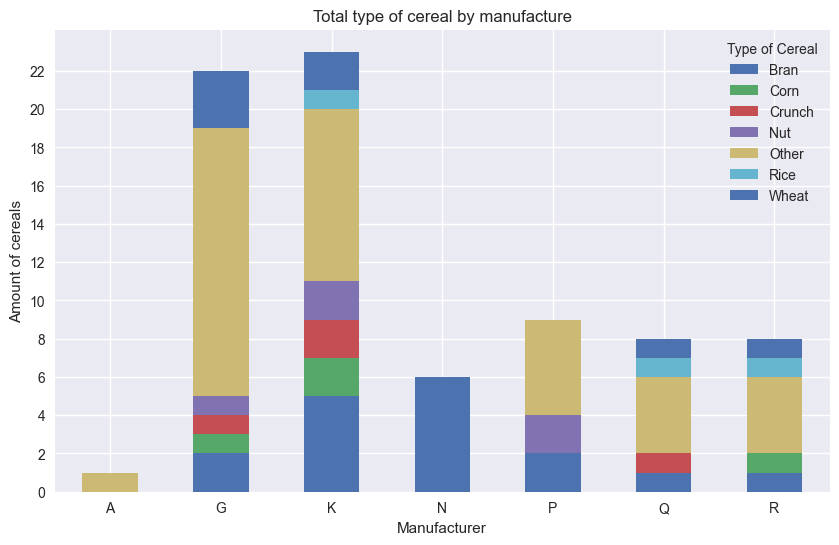

In [194]:
# Group rows by manufacturer
mfrgroup_df = df.groupby('mfr')['Type of Cereal'].value_counts().reset_index()
mfrgroup_df

pivot_df = mfrgroup_df.pivot(index='mfr', columns='Type of Cereal', values='count')

# Set the theme
plt.style.use('seaborn-v0_8')

# Create graph
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Manufacturer')
plt.ylabel('Amount of cereals')
plt.title('Total type of cereal by manufacture')
plt.xticks(rotation=0)
plt.yticks(np.arange(00, 24, 2))
plt.show()


**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

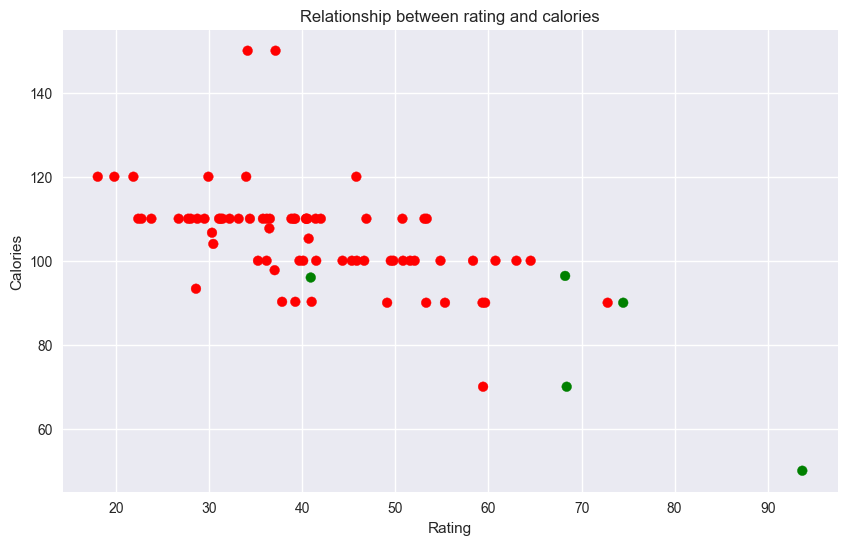

In [199]:
corr_df = df['is_healthy'].apply(lambda x: 'g' if x == 'healthy' else 'r')

plt.figure(figsize=(10, 6))
plt.scatter(x=df['rating'], y=df['calories'], c=corr_df)
plt.xlabel('Rating')
plt.ylabel('Calories')
plt.title("Relationship between rating and calories")
plt.show();


**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?


In [73]:
df.groupby('shelf')['is_healthy'].value_counts()

shelf     is_healthy
1.000000  unhealthy     20
          healthy        1
1.204819  healthy        1
1.503759  unhealthy      1
2.000000  unhealthy     21
2.255639  unhealthy      4
2.307692  unhealthy      1
2.400000  healthy        1
          unhealthy      1
3.000000  unhealthy     22
          healthy        2
6.000000  unhealthy      2
Name: count, dtype: int64

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

# Conclussion